# **Pendahuluan**

Perusahaan penerbangan atau sering juga disebut maskapai penerbangan adalah sebuah perusahaan jasa aviasi atau perusahaan moda pesawat terbang yang memberikan layanan transportasi bagi penumpang atau barang. Sebagai perusahaan jasa, kualitas layanan merupakan aspek utama dalam mempertahankan pelanggan dan meraih keuntungan. Secara umum, perusahaan jasa akan selalu mencoba melakukan improviasi terhadap kualitas pelayanan guna meningkatkan keuntungan dan kemampuan bersaing.

Dalam project ini, sebuah maskapai penerbangan penumpang tengah melakukan **analisa terkait kepuasan pelanggan terhadap pelayanan penerbangan** secara keseluruhan. Pengambilan data kepuasan konsumen serta rekapitulasi telah dilakukan sebelumnya dan perusahaan akan melakukan analisa dan pengambilan keputusan.




# **Pernyataan Masalah**

Secara garis besar, perusahaan ingin mengetahui **tingkat layanan yang telah diberikan selama ini** dan **apa saja yang bisa di-improve**. Perusahaan juga ingin **meningkatkan kepuasan customer** serta **meminimalisir adanya ketidakpuasan pelanggan.**

Dari pernyataan tersebut, dapat dirumuskan pertanyaan-pertanyaan lanjutan yang lebih rinci sebagai berikut:
1.   Bagaimanakah persentase antara pelanggan yang puas dibandingkan dengan yang tidak puas?
2.   Bagaimanakah persentase kepuasan pelanggan di tiap *class* (Eco, Eco Plus, dan Business) dan di tiap kategori keperluan bepergian (Personal Travel dan Business Travel)?
3.   Bagaimana kepuasan dan ketidak puasan pelanggan terhadap fitur-fitur yang telah ada?
4.   Fitur apa saja yang paling memuaskan dan paling tidak memuaskan di tiap class?
5.   Apakah pengaruh jarak penerbangan terhadap kepuasan pelanggan berdasarkan class?
6.   Apakah pengaruh total keterlambatan penerbangan terhadap kepuasan pelanggan berdasarkan class?
7. Fitur apa saja yang paling berpengaruh terhadap kepuasan dan ketidak puasan pelanggan di tiap class? 




# **Data** **Preparation** **& Processing**

Untuk menjawab pernyataan masalah seperti yang telah dijelaskan di atas, dataset yang telah ada akan diolah dan dianalisa. Sebelumnya, diperlukan persiapan dan pemrosesan data yang meliputi pemahaman data atau *data understanding* dan pembersihan data atau *data cleaning*. Langkah pertama yang perlu dilakukan yaitu mempersiapkan *libraries* dan *tools* yang dibutuhkan.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Langkah berikutnya yang dilakukan yaitu melakukan import dan read dataset dari direktori local files. Dataset awal dapat di-akses [di hyperlink ini.](https://drive.google.com/file/d/1xrjh7-smFDNGJJQk-pmh8bM-mpQgahzu/view?usp=sharing) Contoh data 5 teratas dan 5 terbawah ditampilkan seperti berikut ini:

In [ ]:
df = pd.read_csv('airline passanger satisfaction.csv', index_col=0)
display(df.head(),df.tail())

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


## **Data Understanding**

Seperti telah diperlihatkan pada display di atas, dataset yang diberikan memiliki beberapa informasi penting terkait feedback dari pelanggan. Kolom-kolom yang terdapat di dataset adalah sebagai berikut:
1.	**ID:** Passenger ID Number
2.	**Gender:** Jenis kelamin customer
3.	**Customer Type:** Tipe customer berdasarkan loyalitas
4.	**Age:** Usia customer
5.	**Type of Travel:** Keperluan atau alasan bepergian (Personal Travel, Business Travel)
6.	**Class:** Kategori class dalam penerbangan (Business, Eco, Eco Plus)
7.	**Flight distance:** Jarak penerbangan
8.	**Inflight wifi service:** Tingkat kepuasan customer terkait aspek wifi dalam penerbangan
9.	**Departure/Arrival time convenient:** Tingkat kepuasan customer terkait aspek kenyamanan jam keberangkatan dan kedatangan
10.	**Ease of Online booking:** Tingkat kepuasan customer terkait aspek kemudahan online booking
11.	**Gate location:** Tingkat kepuasan customer terkait aspek lokasi gerbang keberangkatan atau kedatangan (garbarata)
12.	**Food and drink:**  Tingkat kepuasan customer terkait aspek makanan dan minuman
13.	**Online boarding:** Tingkat kepuasan customer terkait aspek online boarding
14.	**Seat comfort:** Tingkat kepuasan customer terkait aspek kenyamanan tempat duduk
15.	**Inflight entertainment:** Tingkat kepuasan customer terkait aspek *inflight entertainment* atau hiburan dalam penerbangan
16.	**On-board service:** Tingkat kepuasan customer terkait aspek *On-board service*
17.	**Leg room service:** Tingkat kepuasan customer terkait aspek *Leg room service* atau ruang kaki
18.	**Baggage handling:** Tingkat kepuasan customer terkait aspek penanganan bagasi
19.	**Check-in service:** Tingkat kepuasan customer terkait aspek pelayanan check-in
20.	**Inflight service:** Tingkat kepuasan customer terkait aspek pelayanan selama penerbangan
21.	**Cleanliness:** Tingkat kepuasan customer terkait aspek kebersihan
22.	**Departure Delay in Minutes:** Keterlambatan keberangkatan dalam menit
23.	**Arrival Delay in Minutes:** Keterlambatan kedatangan dalam menit
24.	**Satisfaction:** Kepuasan pelanggan secara keseluruhan (Puas vs. Tidak Puas atau Netral)

Berikut merupakan informasi general terkait dengan dataset yang akan dianalisa.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [ ]:
display(df.describe(), df.describe(include='object'))

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [ ]:
listData= []
for col in df.columns :
    listData.append( [col, df[col].nunique(), df[col].unique()])

tabelDesc = pd.DataFrame(columns=['Column Description', 'Number of Unique Value', 'Unique Value Description'],
                     data=listData)
tabelDesc

,Column Description,Number of Unique Value,Unique Value Description
0,id,103904,"[70172, 5047, 110028, 24026, 119299, 111157, 8..."
1,Gender,2,"[Male, Female]"
2,Customer Type,2,"[Loyal Customer, disloyal Customer]"
3,Age,75,"[13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 3..."
4,Type of Travel,2,"[Personal Travel, Business travel]"
5,Class,3,"[Eco Plus, Business, Eco]"
6,Flight Distance,3802,"[460, 235, 1142, 562, 214, 1180, 1276, 2035, 8..."
7,Inflight wifi service,6,"[3, 2, 4, 1, 5, 0]"
8,Departure/Arrival time convenient,6,"[4, 2, 5, 3, 1, 0]"
9,Ease of Online booking,6,"[3, 2, 5, 4, 1, 0]"


Secara garis besar, dapat disimpulkan dari Data Frame yang telah ditunjukkan di atas bahwa:

1. Dataset yang digunakan dalam analisis ini memiliki 24 kolom dan 103,904 baris.
2. Kolom ID merupakan kolom yang mencakup semua unique values dan tidak ada data duplicate karena jumlah unique value di kolom ID dengan total kolom secara keseluruhan sama.
3. Kolom `Gender`, `Customer Type`, `Type of Travel`, `Class` dan `Satisfaction` merupakan data kategorikal yang membagi data-data yang ada dalam dataset di atas menjadi beberapa kategori.
4. Kolom `Inflight wifi service`, `Departure/Arrival time convenient`, `Ease of Online booking`, `Gate location`, `Food and drink`, `Online boarding`, `Seat comfort`, `Inflight entertainment`, `On-board service`, `Leg room service`, `Baggage handling`, `Checkin service`, `Inflight service`, serta `Cleanliness` merupakan data numerikal dengan rentang nilai 0 - 5 yang menyimpan feedback responden terhadap fitur fitur pelayanan yang ada pada maskapai penerbangan. Penilaian menggunakan **skala Likert** (Angka 0 mewakili pelayanan paling buruk dan angka 5 mewakili pelayanan paling baik).
5. Kolom `Age`, `Flight Distance`, `Departure Delay in Minutes`, dan `Arrival Delay in Minutes` adalah data numerikal positif dengan rentang tak terbatas.

Setelah memahami data secara garis besar, perlu dicari apakah terdapat *missing values* atau tidak yaitu sebagai berikut:

In [ ]:
df.isna().sum()/df.shape[0]*100

id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                          0.000000
Departure Delay in Minutes        

Seperti telah digambarkan dataframe di atas, dataset memiliki *missing value* di kolom *Arrival Delay in Minutes* atau durasi keterlambatan kedatangan dalam menit sebanyak 0.298352% atau sekitar 0.3%. *Missing value* akan ditangani di proses selanjutnya yaitu process *data cleaning*.


## **Data Cleaning**

Terdapat dua cara untuk menangani *missing value*:
* Menghapus baris / kolom yang berisi *missing value*. 
* Mengisi data yang hilang.

Dikarenakan *missing value* yang terdapat dalam dataset yang diberikan hanya sebanyak 0.3%, **metode menghapus baris / kolom yang terdapat *missing value* akan jauh lebih mudah dan lebih cepat untuk dilakukan** namun terdapat resiko menghapus data atau informasi yang berharga walau kecil sehingga dalam proses *data cleaning* berikut, akan dilakukan pengecekan terlebih dahulu.

In [ ]:
display(df[df['Arrival Delay in Minutes'].isna()]['satisfaction'].value_counts())

neutral or dissatisfied    182
satisfied                  128
Name: satisfaction, dtype: int64

In [ ]:
display(df[df['Arrival Delay in Minutes'].isna()]['Class'].value_counts())

Eco         152
Business    132
Eco Plus     26
Name: Class, dtype: int64

In [ ]:
display(df[df['Arrival Delay in Minutes'].isna()]['Type of Travel'].value_counts())

Business travel    190
Personal Travel    120
Name: Type of Travel, dtype: int64

Seperti telah ditunjukkan dalam beberapa fungsi di atas, missing value yang ada dalam kolom '*Arrival Delay in Minutes*' tersebar ke beberapa kategori values dan tidak berada dalam satu kategori saja (misal hanya berada di *class* *business* saja atau hanya berada di *satisfied* *value* saja) sehingga **dapat diasumsikan bahwa apabila data dihapus, analisa data tidak terpengaruh** selain juga karena missing value hanya berjumlah 0.3%. Oleh karena itu, kita akan menghapus *missing values* dengan cara berikut ini:

In [ ]:
df = df.dropna(axis=0)
df.isna().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

Setelah menghilangkan missing values, data akan dibersihkan kembali untuk menghilangkan kolom-kolom yang tidak dipakai di analisa ini. 

Analisa berikut ini tidak menggunakan ID penumpang karena unique values tidak dibutuhkan dalam penghitungan agregat, serta tidak akan memperhatikan umur penumpang, gender penumpang serta tipe kustomer (loyal atau tidak). 

Penelitian akan difokuskan ke arah **kategorisasi dan improvisasi pelayanan** berdasarkan **kelas penerbangan (Class)** serta **alasan perjalanan (Type of Travel)** untuk bisa dinikmati segala gender, semua umur, serta melayani semua masyarakat baik pelanggan loyal maupun tidak. Data data yang tidak dibutuhkan akan dihapus sebagai berikut:

In [ ]:
df = df.drop(['id', 'Gender', 'Customer Type', 'Age'], axis=1)
display(df.head(),df.tail())

,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,Business travel,Business,1723,1,3,3,3,1,1,1,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Type of Travel                     103594 non-null  object 
 1   Class                              103594 non-null  object 
 2   Flight Distance                    103594 non-null  int64  
 3   Inflight wifi service              103594 non-null  int64  
 4   Departure/Arrival time convenient  103594 non-null  int64  
 5   Ease of Online booking             103594 non-null  int64  
 6   Gate location                      103594 non-null  int64  
 7   Food and drink                     103594 non-null  int64  
 8   Online boarding                    103594 non-null  int64  
 9   Seat comfort                       103594 non-null  int64  
 10  Inflight entertainment             103594 non-null  int64  
 11  On-board service                   1035

In [ ]:
display(df.describe(), df.describe(include='object'))

,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


,Type of Travel,Class,satisfaction
count,103594,103594,103594
unique,2,3,2
top,Business travel,Business,neutral or dissatisfied
freq,71465,49533,58697


Dalam dataset ini juga diasumsikan tidak ada outliers karena sebagian besar data merupakan data numerik kategorikal yang menunjukkan skor penilaian terhadap pelayanan dan data lainnya yaitu kolom `Flight Distance`, `Departure Delay in Minutes`, dan `Arrival Delay in Minutes` merupakan data yang tidak memiliki batas atas dalam pengisian. Namun, dalam analisa nanti, akan dilakukan filtrasi data terkait dengan keterlambatan penerbangan, namun tidak perlu melakukannya di *data cleaning*.

# **Data Analysis**

Setelah memahami data dan melakukan pembersihan, proses analisa data dapat dimulai untuk menjawab masalah-masalah yang telah dinyatakan sebelumnya. Analisa dapat dimulai dari pernyataan masalah pertama sampai dengan terakhir.

## **Persentase pelanggan yang puas & yang tidak puas secara umum**

Untuk menjawab pernyataan masalah pertama, berikut adalah persentase antara pelanggan yang puas dibandingkan dengan yang tidak puas:

In [ ]:
df['satisfaction'].value_counts()

neutral or dissatisfied    58697
satisfied                  44897
Name: satisfaction, dtype: int64

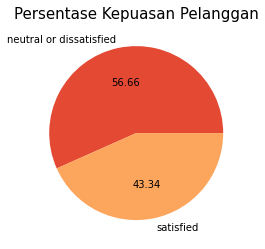

In [ ]:
palette_color = sns.color_palette('RdYlGn')
plt.pie(df['satisfaction'].value_counts(), 
        labels = df['satisfaction'].unique(),
        autopct = '%.2f',
        colors = palette_color)
plt.title('Persentase Kepuasan Pelanggan', size=15)
plt.show()

Berdasarkan *value counts* dan *pie chart* di atas, dapat dilihat secara *general* bahwa lebih banyak responden atau pelanggan yang memberikan respon neutral atau tidak puas dibandingkan dengan respon *satisfied* atau puas terhadap pelayanan maskapai secara umum sehingga dapat ditarik **kesimpulan sementara** bahwa **terdapat pelayanan yang kurang memuaskan** dan **adanya kebutuhan untuk melakukan improvement layanan**.

## **Persentase kepuasan pelanggan di tiap *class***

Untuk menjawab pernyataan masalah kedua, berikut ditunjukkan jumlah perhitungan agregat serta persentase kepuasan pelanggan di tiap *class* (Eco, Eco Plus, dan Business):

In [ ]:
pd.crosstab(index=[df['Class']], columns=df['satisfaction'], normalize=False, margins=True)

satisfaction,neutral or dissatisfied,satisfied,All
Class,,,
Business,15143,34390,49533
Eco,37922,8671,46593
Eco Plus,5632,1836,7468
All,58697,44897,103594


In [ ]:
(pd.crosstab(index=[df['Class']], columns=df['satisfaction'], normalize=True, margins=True)*100).round(2)

satisfaction,neutral or dissatisfied,satisfied,All
Class,,,
Business,14.62,33.20,47.81
Eco,36.61,8.37,44.98
Eco Plus,5.44,1.77,7.21
All,56.66,43.34,100.00


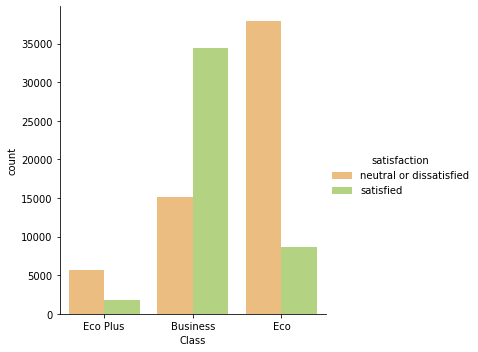

In [ ]:
sns.catplot(data=df, x='Class', hue='satisfaction', kind='count', palette='RdYlGn')
plt.show()

Dalam figur dan tabel di atas, dapat dilihat bahwa **jumlah terbanyak responden** adalah pelanggan dari kategori **Business Class** yaitu sebanyak 49533 responden atau sekitar 47.81% dari total keseluruhan responden diikuti dengan **Eco Class** dengan selisih yang kecil yaitu sebanyak 46593 atau sekitar 44.98%. Responden paling sedikit yaitu dari class Eco Plus dengan persentase sekitar 7.21% saja. 

Kemudian, dilakukan kategorisasi kembali terkait dengan keputusan puas maupun tidaknya responden per *class* terhadap keseluruhan pelayanan maskapai. Dari kategorisasi yang telah dilakukan, dapat dilihat bahwa sekitar 37922 responden tidak puas dengan pelayanan pada **Eco Class**. Nilai tersebut adalah 4 kali jumlah responden yang puas terhadap pelayanan **Eco Class** yaitu sekitar 8671 responden.

Hal ini berbanding terbalik dengan responden dari **Business Class** dimana sekitar 34390 responden puas atau satisfied dengan keseluruhan pelayanan, 2 kali jumlah responden **Business Class** yang netral atau tidak puas yaitu 15143 responden.

Kesimpulan sementara yang didapat dari analisa ini yaitu pelayanan **Business Class** dari maskapai penerbangan ini jauh lebih baik dibandingkan terhadap **Eco Class**.

## **Persentase kepuasan pelanggan di tiap kategori alasan atau keperluan bepergian**

Berikut ditunjukkan jumlah perhitungan agregat serta persentase kepuasan pelanggan di tiap kategori keperluan bepergian (Business travel, Personal Travel):

In [ ]:
df['Type of Travel'].value_counts()

Business travel    71465
Personal Travel    32129
Name: Type of Travel, dtype: int64

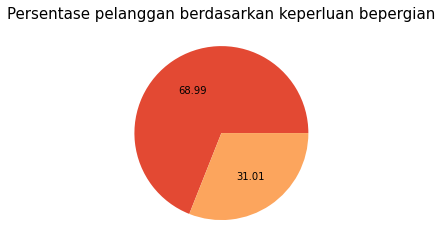

In [ ]:
plt.pie(df['Type of Travel'].value_counts(),
        autopct = '%.2f',
        colors = palette_color)
plt.title('Persentase pelanggan berdasarkan keperluan bepergian', size=15)
plt.show()

In [ ]:
(pd.crosstab(index=[df['Type of Travel']], columns=df['Class'], normalize=True, margins=True)*100).round(2)

Class,Business,Eco,Eco Plus,All
Type of Travel,,,,
Business travel,45.74,19.50,3.74,68.99
Personal Travel,2.07,25.48,3.46,31.01
All,47.81,44.98,7.21,100.00


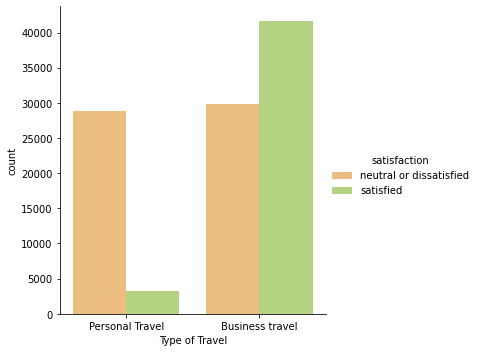

In [ ]:
sns.catplot(data=df, x='Type of Travel', hue='satisfaction', kind='count', palette='RdYlGn')
plt.show()

Dapat dilihat bahwa sebagian besar responden atau pelanggan merupakan *business traveler* yaitu sebesar 68.99% dan 45% dari total *traveler* adalah *business traveler* yang menggunakan penerbangan *business class*.

Porsi yang juga cukup besar adalah *personal traveler* dan *business traveler* yang menggunakan **Eco Class** dengan masing masing sebesar 19.50% dan 25.48%. 

Secara total, ketidak puasan pelanggan sama besarnya baik dari kategori *personal traveler* maupun *business traveler* **teks tebal** (hampir menyentuh angka 30000 responden) namun secara signifikan, sebagian besar *personal traveler* adalah orang-orang yang netral atau tidak puas terhadap pelayanan maskapai.

## **Kepuasan dan ketidak puasan terkait fitur-fitur yang telah ada secara umum**

Berikut ditunjukkan kepuasan dan ketidak puasan secara umum:

In [ ]:
allSatis =[]

for col in df.columns[3:17]:
    allSatis.append([col, df[col].mode()[0], df[col].mean()])
df2 = pd.DataFrame(allSatis, columns=['Fitur', 'Modus', 'Rata-rata'])

df2.sort_values(by=['Rata-rata'], ascending=False)

,Fitur,Modus,Rata-rata
12,Inflight service,4,3.640761
10,Baggage handling,4,3.631687
6,Seat comfort,4,3.439765
8,On-board service,4,3.382609
7,Inflight entertainment,4,3.358341
9,Leg room service,4,3.351401
11,Checkin service,4,3.304323
13,Cleanliness,4,3.286397
5,Online boarding,4,3.250497
4,Food and drink,4,3.202126


Berdasarkan data frame yang ada di atas, 3 fitur yang memiliki nilai responden tertinggi secara general yaitu: 

* **Inflight service**, dengan modus 4	dan nilai rata rata 3.640761
* **Baggage handling**,	dengan modus 4	dan nilai rata rata 3.631687
* **Seat comfort**,	dengan modus 4 dan nilai rata rata 3.439765

Sedangkan, 3 fitur yang memiliki nilai responden terendah yaitu:

* **Gate location**, dengan modus 3	dan nilai rata rata 2.977026
* **Ease of Online booking**,	dengan modus 3	dan nilai rata rata 2.756984
* **Inflight wifi service**,	dengan modus 3 dan nilai rata rata 2.729753

## **Fitur paling memuaskan dan paling tidak memuaskan di tiap class**

Berikut ditunjukkan kepuasan dan ketidak puasan tiap tiap fitur dikategorikan dengan *class* masing masing dimulai dari *Eco Class*:

In [ ]:
dfEco = df[df['Class']=='Eco']

ecoSatis =[]

for col in dfEco.columns[3:17]:
    ecoSatis.append([col, dfEco[col].mode()[0], dfEco[col].mean()])
dfEcoDisp = pd.DataFrame(ecoSatis, columns=['Fitur', 'Modus', 'Rata-rata'])
dfEcoDisp = dfEcoDisp.sort_values(by=['Rata-rata'], ascending=False)
dfEcoDisp

,Fitur,Modus,Rata-rata
12,Inflight service,4,3.464791
10,Baggage handling,4,3.450153
1,Departure/Arrival time convenient,4,3.199043
6,Seat comfort,4,3.139399
11,Checkin service,4,3.122250
8,On-board service,4,3.120834
13,Cleanliness,4,3.108278
7,Inflight entertainment,4,3.098470
4,Food and drink,4,3.086451
9,Leg room service,3,3.086129


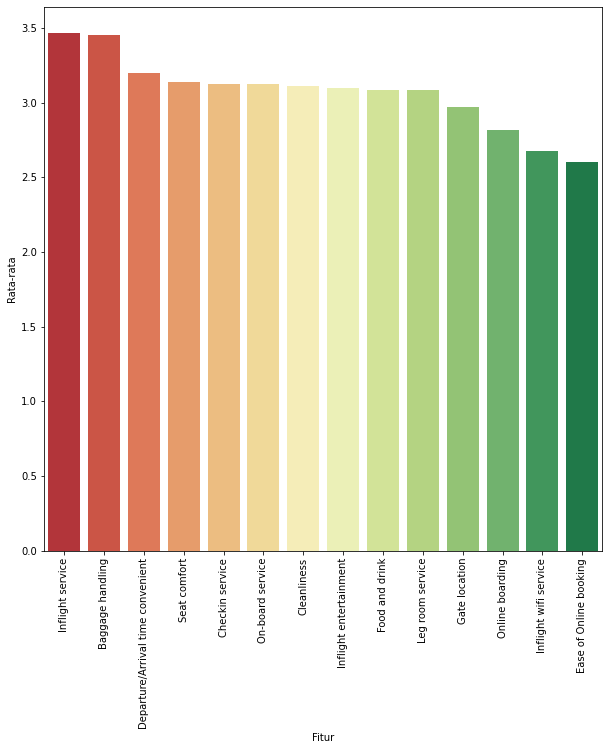

In [ ]:
plt.figure(figsize=(10, 10))
sns.barplot(x='Fitur', y='Rata-rata', data=dfEcoDisp, palette='RdYlGn')
plt.xticks(rotation=90)
plt.show()

In [ ]:
dfEcoPlus = df[df['Class']=='Eco Plus']

ecoplusSatis =[]

for col in dfEcoPlus.columns[3:17]:
    ecoplusSatis.append([col, dfEcoPlus[col].mode()[0], dfEcoPlus[col].mean()])
dfEcoPlusDisp = pd.DataFrame(ecoplusSatis, columns=['Fitur', 'Modus', 'Rata-rata'])
dfEcoPlusDisp = dfEcoPlusDisp.sort_values(by=['Rata-rata'], ascending=False)
dfEcoPlusDisp

,Fitur,Modus,Rata-rata
12,Inflight service,4,3.387654
10,Baggage handling,4,3.363953
1,Departure/Arrival time convenient,4,3.216256
6,Seat comfort,4,3.184521
7,Inflight entertainment,4,3.142073
13,Cleanliness,4,3.130557
4,Food and drink,4,3.123192
9,Leg room service,3,3.061328
8,On-board service,4,3.045929
11,Checkin service,3,3.016470


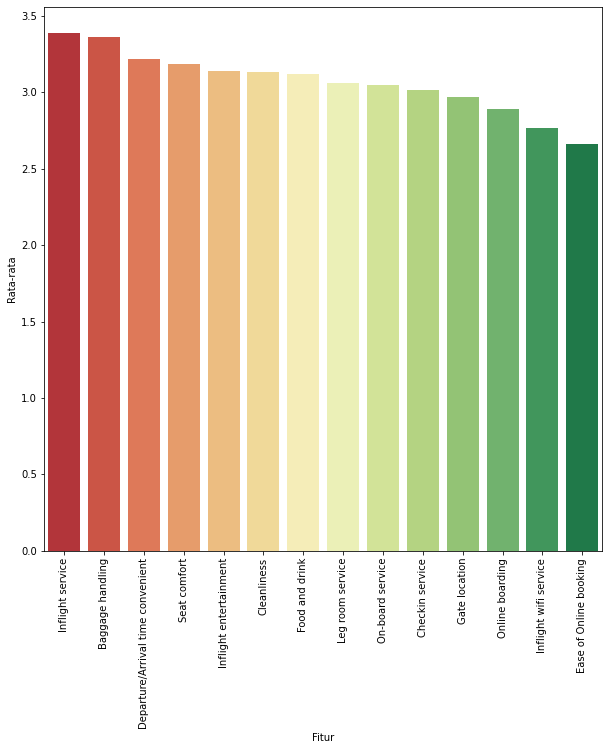

In [ ]:
plt.figure(figsize=(10, 10))
sns.barplot(x='Fitur', y='Rata-rata', data=dfEcoPlusDisp, palette='RdYlGn')
plt.xticks(rotation=90)
plt.show()

In [ ]:
dfBusiness = df[df['Class']=='Business']

businessSatis =[]

for col in dfBusiness.columns[7:21]:
    businessSatis.append([col, dfBusiness[col].mode()[0], dfBusiness[col].mean()])
dfBusinessDisp = pd.DataFrame(businessSatis, columns=['Fitur', 'Modus', 'Rata-rata'])
dfBusinessDisp = dfBusinessDisp.sort_values(by=['Rata-rata'], ascending=False)
dfBusinessDisp

,Fitur,Modus,Rata-rata
12,Inflight service,4,3.844447
10,Baggage handling,4,3.842812
6,Seat comfort,4,3.760786
5,Online boarding,4,3.716411
8,On-board service,4,3.679608
9,Leg room service,4,3.644661
7,Inflight entertainment,4,3.635395
11,Checkin service,4,3.518987
13,Cleanliness,4,3.477439
4,Food and drink,4,3.322835


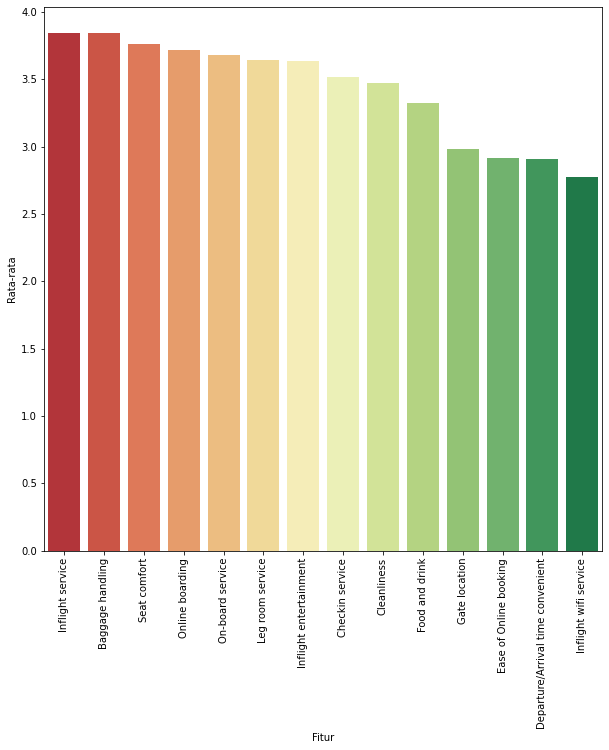

In [ ]:
plt.figure(figsize=(10, 10))
sns.barplot(x='Fitur', y='Rata-rata', data=dfBusinessDisp, palette='RdYlGn')
plt.xticks(rotation=90)
plt.show()

Berdasarkan data frame yang ada di atas, 3 fitur yang memiliki nilai responden tertinggi pada *Eco Class* yaitu: 

* **Inflight service**, dengan modus 4	dan nilai rata rata 3.464791
* **Baggage handling**,	dengan modus 4	dan nilai rata rata 3.450153
* **Departure/Arrival time convenient**,	dengan modus 4 dan nilai rata rata 3.199043

Sedangkan, 3 fitur yang memiliki nilai responden terendah pada *Eco Class* yaitu:

* **Online boarding**, dengan modus 3	dan nilai rata rata 2.812933
* **Inflight wifi service**,	dengan modus 3	dan nilai rata rata 2.675316
* **Ease of Online booking**,	dengan modus 3 dan nilai rata rata 2.605091

Berikutnya, 3 fitur yang memiliki nilai responden tertinggi pada *Eco Plus Class* yaitu: 
* **Inflight service**,	dengan modus	4	dan nilai rata rata 3.387654
* **Baggage handling**,	dengan modus	4	dan nilai rata rata 3.363953
* **Departure/Arrival time convenient**,	dengan modus	4 dan nilai rata rata	3.216256

Sedangkan, 3 fitur yang memiliki nilai responden terendah pada *Eco Plus Class* yaitu:
* **Online boarding**,	dengan modus	3	dan nilai rata rata 2.890198
* **Inflight wifi service**,	dengan modus	2 dan nilai rata rata	2.767809
* **Ease of Online booking**,	dengan modus	2 dan nilai rata rata	2.662694

Terakhir, 3 fitur yang memiliki nilai responden tertinggi pada *Business Class* yaitu: 
* **Inflight service**,	dengan modus	4 dan nilai rata rata	3.844447
* **Baggage handling**,	dengan modus	4	dan nilai rata rata 3.842812
* **Seat comfort**,	dengan modus	4	dan nilai rata rata 3.760786

Dan 3 fitur yang memiliki nilai responden terendah pada *Business Class* yaitu:
* **Ease of Online booking**,	dengan modus	4 dan nilai rata rata	2.914077
* **Departure/Arrival time convenient**,	dengan modus	4 dan nilai rata rata	2.905820
* **Inflight wifi service**,	dengan modus 2 dan nilai rata rata	2.775221


## **Pengaruh jarak penerbangan terhadap kepuasan pelanggan berdasarkan kelas**

Dalam penelitian ini, jarak penerbangan akan dianalisa pengaruhnya terhadap kepuasan pelanggan berdasarkan kelas. Analisa dapat dilihat seperti di bawah ini:

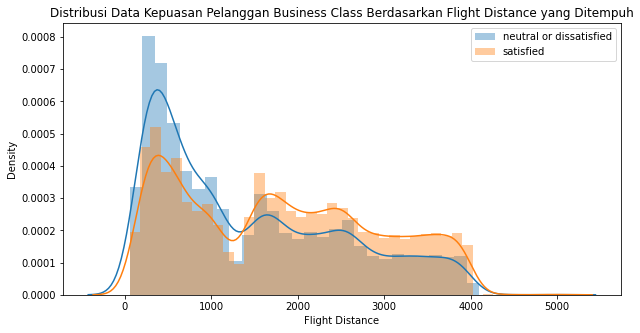

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(dfBusiness[dfBusiness['satisfaction']=='neutral or dissatisfied']['Flight Distance'],label='neutral or dissatisfied')
sns.distplot(dfBusiness[dfBusiness['satisfaction']=='satisfied']['Flight Distance'],label='satisfied')
plt.title('Distribusi Data Kepuasan Pelanggan Business Class Berdasarkan Flight Distance yang Ditempuh')
plt.legend()
plt.show()

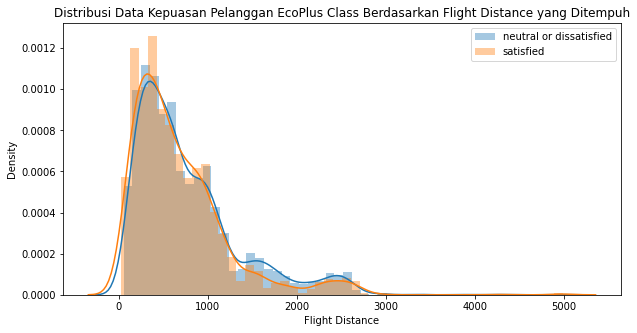

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(dfEcoPlus[dfEcoPlus['satisfaction']=='neutral or dissatisfied']['Flight Distance'],label='neutral or dissatisfied')
sns.distplot(dfEcoPlus[dfEcoPlus['satisfaction']=='satisfied']['Flight Distance'],label='satisfied')
plt.title('Distribusi Data Kepuasan Pelanggan EcoPlus Class Berdasarkan Flight Distance yang Ditempuh')
plt.legend()
plt.show()

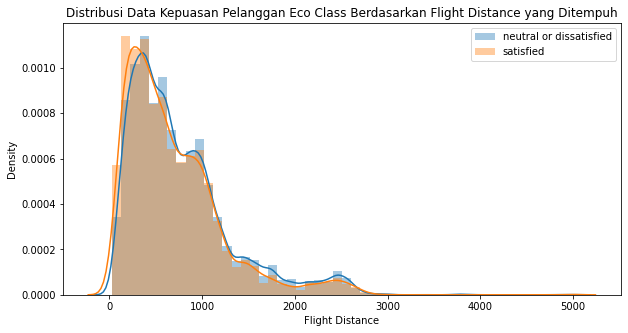

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(dfEco[dfEco['satisfaction']=='neutral or dissatisfied']['Flight Distance'],label='neutral or dissatisfied')
sns.distplot(dfEco[dfEco['satisfaction']=='satisfied']['Flight Distance'],label='satisfied')
plt.title('Distribusi Data Kepuasan Pelanggan Eco Class Berdasarkan Flight Distance yang Ditempuh')
plt.legend()
plt.show()

Berdasarkan grafik pertama di atas, kepuasan pelanggan *Business Class* masih lebih tinggi dibandingkan ketidak puasan di jarak penerbangan lebih dari 1500 miles. Namun, ketidak puasan lebih tinggi dibandingkan kepuasan di penerbangan jarak pendek atau kurang dari 1500 miles.

Selanjutnya, berdasarkan grafik kedua dan ketiga, kepuasan penumpang *Eco Class* dan *Eco Plus Class* menunjukkan trend yang konsisten dimana flight distance tidak berpengaruh signifikan terhadap perbedaan tingkat kepuasan. Mayoritas penumpang *Eco Class* dan *Eco Plus Class* melakukan perjalanan kurang dari 1500 miles dan lebih banyak yang netral atau tidak puas daripada penumpang yang puas.

Dapat ditarik kesimpulan sementara terkait aspek ini dimana penerbangan dengan jarak lebih dari 1500 miles memiliki pelayanan lebih baik dibandingkan penerbangan jarak pendek. Salah satu spekulan faktor yang mendasari hal ini dapat berupa jenis pesawat yang digunakan dan fasilitas yang ada di pesawat tersebut.

## **Pengaruh total keterlambatan terhadap kepuasan pelanggan berdasarkan kelas**

Dalam penelitian ini, total keterlambatan akan dianalisa pengaruhnya terhadap kepuasan pelanggan berdasarkan kelas. Total keterlambatan dihitung dari keterlambatan kedatangan ditambahkan dengan keterlambatan keberangkatan. Selain itu, dilakukan filtrasi terhadap total keterlambatan yaitu maximum 1440 menit atau sama dengan 24 jam karena keterlambatan di atas 24 jam dapat diasumsikan sebagai force majeure. Analisa dapat dilihat seperti di bawah ini:

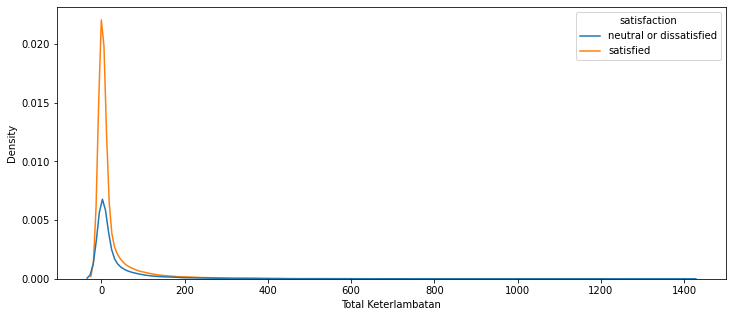

In [ ]:
dfBusiness['Total Keterlambatan'] = dfBusiness['Arrival Delay in Minutes'] + dfBusiness['Departure Delay in Minutes']
plt.figure(figsize=(12, 5))
sns.kdeplot(data= dfBusiness[dfBusiness['Total Keterlambatan']<=1440], x='Total Keterlambatan', hue='satisfaction')
plt.show()

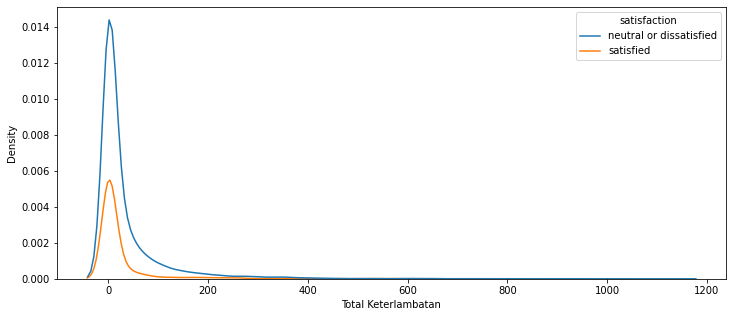

In [ ]:
dfEcoPlus['Total Keterlambatan'] = dfEcoPlus['Arrival Delay in Minutes'] + dfEcoPlus['Departure Delay in Minutes']
plt.figure(figsize=(12, 5))
sns.kdeplot(data= dfEcoPlus[dfEcoPlus['Total Keterlambatan']<=1440], x='Total Keterlambatan', hue='satisfaction')
plt.show()

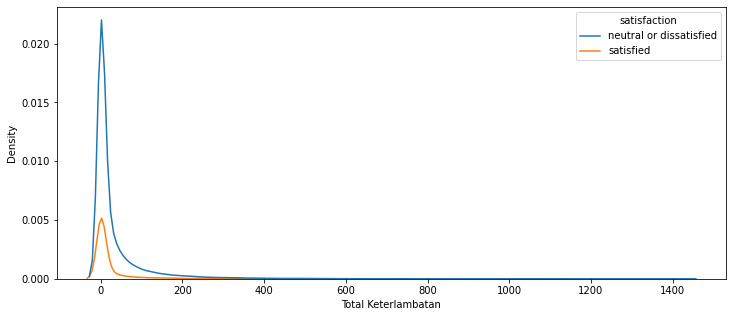

In [ ]:
dfEco['Total Keterlambatan'] = dfEco['Arrival Delay in Minutes'] + dfEco['Departure Delay in Minutes']
plt.figure(figsize=(12, 5))
sns.kdeplot(data= dfEco[dfEco['Total Keterlambatan']<=1440], x='Total Keterlambatan', hue='satisfaction')
plt.show()

Berdasarkan grafik-grafik di atas, grafik menunjukkan tren yang konsisten terhadap pernyataan awal dan tidak menunjukkan perbedaan. Walaupun sejatinya keterlambatan pasti memiliki dampak terhadap tingkat pelayanan, dapat disimpulkan bahwa total keterlambatan memiliki pengaruh yang minim dan masih banyak aspek aspek lain yang memiliki pengaruh lebih signifikan.

## **Fitur yang paling berpengaruh terhadap kepuasan dan ketidak puasan pelanggan di tiap class**

Dalam mencari fitur yang paling berpengaruh terhadap kepuasan, akan dilakukan uji korelasi dari tiap tiap aspek pendukung kepuasan. Uji korelasi akan dilakukan untuk *Business Class* dan *Eco Class* sebagai *class* yang memiliki jumlah responden paling signifikan.

In [ ]:
dfBusinessCorr = dfBusiness[['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction']]
dfBusinessCorr['satisfaction'] = dfBusinessCorr['satisfaction'].map({'satisfied':1,'neutral or dissatisfied':0})
dfBusinessCorr.corr().sort_values('satisfaction', axis=0, ascending=False)

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
satisfaction,0.178815,0.018653,0.069512,0.002285,0.229730,0.512935,0.428288,0.509791,0.438129,0.429785,0.381194,0.335491,0.381428,0.404105,1.000000
Online boarding,0.257696,0.110169,0.184939,0.000701,0.270958,1.000000,0.518892,0.354433,0.205988,0.199066,0.149198,0.268384,0.144912,0.408924,0.512935
Inflight entertainment,0.188630,0.026690,0.038288,0.006094,0.415887,0.354433,0.527269,1.000000,0.641108,0.557504,0.599669,0.195919,0.631369,0.545239,0.509791
On-board service,0.169493,0.009414,0.040004,-0.008676,0.080505,0.205988,0.200399,0.641108,1.000000,0.592019,0.695174,0.258646,0.729641,0.198100,0.438129
Leg room service,0.176660,0.024727,0.072326,0.003397,0.062595,0.199066,0.195066,0.557504,0.592019,1.000000,0.588476,0.206476,0.591847,0.184671,0.429785
Seat comfort,0.086091,0.027182,-0.000219,0.005507,0.434245,0.518892,1.000000,0.527269,0.200399,0.195066,0.147650,0.263590,0.140347,0.586836,0.428288
Cleanliness,0.089372,0.017869,-0.000631,0.001171,0.453083,0.408924,0.586836,0.545239,0.198100,0.184671,0.185200,0.249545,0.176771,1.000000,0.404105
Inflight service,0.183820,-0.000428,0.048081,-0.007850,0.072305,0.144912,0.140347,0.631369,0.729641,0.591847,0.780812,0.263013,1.000000,0.176771,0.381428
Baggage handling,0.201300,0.003265,0.050097,-0.006232,0.076818,0.149198,0.147650,0.599669,0.695174,0.588476,1.000000,0.267898,0.780812,0.185200,0.381194
Checkin service,0.066913,0.000793,0.001027,-0.013842,0.129787,0.268384,0.263590,0.195919,0.258646,0.206476,0.267898,1.000000,0.263013,0.249545,0.335491


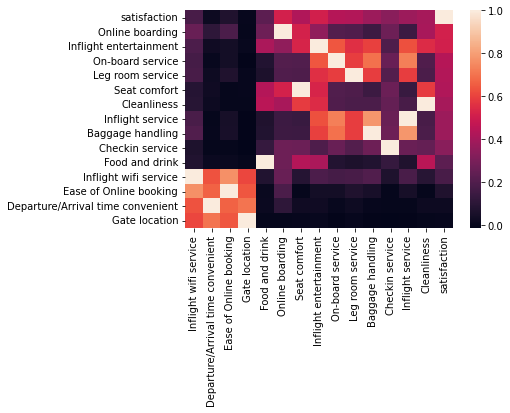

In [ ]:
sns.heatmap(dfBusinessCorr.corr().sort_values('satisfaction', axis=0, ascending=False))

In [ ]:
dfEcoCorr = dfEco[['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction']]
dfEcoCorr['satisfaction'] = dfEcoCorr['satisfaction'].map({'satisfied':1,'neutral or dissatisfied':0})
dfEcoCorr.corr().sort_values('satisfaction', axis=0, ascending=False)

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
satisfaction,0.467873,-0.019405,0.232928,-0.009761,0.140464,0.315765,0.122317,0.181877,0.073763,0.066935,0.008472,0.034793,0.007225,0.134002,1.000000
Inflight wifi service,1.000000,0.052644,0.682233,-0.002579,0.168649,0.686963,0.130115,0.200164,0.065864,0.138100,0.033583,0.010679,0.031243,0.145688,0.467873
Online boarding,0.686963,0.109751,0.617682,-0.006685,0.155459,1.000000,0.247528,0.125579,-0.000097,-0.051306,-0.064052,0.079090,-0.074681,0.205296,0.315765
Ease of Online booking,0.682233,0.215731,1.000000,0.215221,0.032308,0.617682,0.007591,0.014625,-0.003405,0.105016,-0.007348,-0.010944,-0.009446,0.002282,0.232928
Inflight entertainment,0.200164,0.002208,0.014625,-0.002403,0.784210,0.125579,0.641696,1.000000,0.198288,0.046384,0.167584,0.004800,0.190603,0.792927,0.181877
Food and drink,0.168649,0.008418,0.032308,-0.007308,1.000000,0.155459,0.679890,0.784210,0.006331,-0.023074,-0.023211,0.024383,-0.020803,0.816241,0.140464
Cleanliness,0.145688,0.033430,0.002282,-0.013080,0.816241,0.205296,0.734997,0.792927,0.013417,-0.018605,-0.011739,0.086111,-0.019004,1.000000,0.134002
Seat comfort,0.130115,0.038323,0.007591,-0.003103,0.679890,0.247528,1.000000,0.641696,-0.003338,-0.040652,-0.046927,0.078578,-0.049305,0.734997,0.122317
On-board service,0.065864,0.161891,-0.003405,-0.051793,0.006331,-0.000097,-0.003338,0.198288,1.000000,0.121307,0.354213,0.188081,0.385887,0.013417,0.073763
Leg room service,0.138100,0.041021,0.105016,-0.016381,-0.023074,-0.051306,-0.040652,0.046384,0.121307,1.000000,0.153206,0.060021,0.154477,-0.018605,0.066935


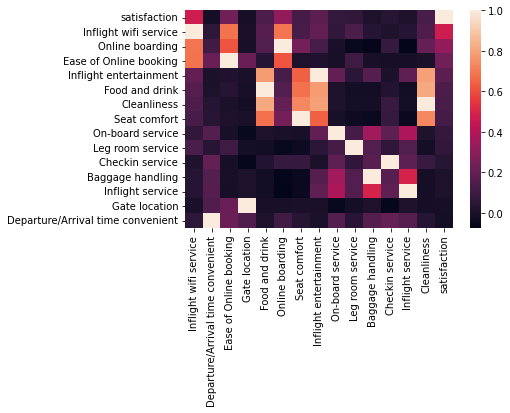

In [ ]:
sns.heatmap(dfEcoCorr.corr().sort_values('satisfaction', axis=0, ascending=False))

Berdasarkan uji korelasi di atas, tiga aspek yang memiliki korelasi paling kuat terhadap kepuasan responden di *Business Class* yaitu aspek fitur **Online boarding**, **Inflight entertainment**, dan **On-board service**. 

Berikutnya, tiga aspek yang memiliki korelasi paling kuat terhadap kepuasan responden di *Eco Class* yaitu aspek fitur **Inflight wifi service**, **Online boarding**, dan **Ease of Online booking**.

# **Kesimpulan dan Saran**

Berdasarkan analisa yang telah dilakukan sebagaimana dijelaskan di atas, dapat ditarik kesimpulan serta diformulasikannya saran dan rekomendasi. Kesimpulan dan saran yang dapat ditarik dari analisis ini adalah sebagai berikut:

## **Kesimpulan Analisa**

Kesimpulan yang dapat menjawab pernyataan masalah seperti telah dijelaskan di awal penelitian ini adalah sebagai berikut:


1. Persentase antara pelanggan yang puas lebih sedikit dibandingkan dengan yang tidak puas sehingga dapat disimpulkan **terdapat pelayanan yang kurang memuaskan** dan **adanya kebutuhan untuk melakukan improvement layanan**.

2. Berdasarkan pengkategorian berdasarkan *class*, pelayanan **Business Class** dari maskapai penerbangan ini jauh lebih baik dibandingkan **Eco Class** dan **Eco Plus Class** dibuktikan dengan kepuasan responden yang secara signifikan terpaut jauh antara dua *class* tersebut. Walaupun sejatinya pelayanan **Business Class** pasti lebih baik namun maskapai juga perlu meningkatkan kepuasan pelanggan terhadap *class* lain.

3. Ketidak puasan pelanggan sama besarnya baik dari kategori *personal traveler* maupun *business traveler* (hampir menyentuh angka 30000 responden) namun secara signifikan, sebagian besar *personal traveler* adalah orang-orang yang netral atau tidak puas terhadap pelayanan maskapai dan lebih dari 50% *business traveler* puas terhadap pelayanan.

4. Secara keseluruhan dari semua *Class*, 3 fitur yang memiliki nilai responden tertinggi yaitu **Inflight service**, **Baggage handling**,	dan **Seat comfort** sedangkan 3 fitur yang memiliki nilai responden terendah yaitu **Gate location**, **Ease of Online booking**, dan **Inflight wifi service**.

5. Dari tiap tiap *Class*, tiga fitur yang paling memuaskan dan tiga yang paling tidak memuaskan dapat dilihat sebagai berikut:

  * Untuk *Eco Class* dan *Eco Plus Class*, fitur fitur yang berada pada Top 3 dan Bottom 3 adalah sama. Top 3 fitur untuk *classes* tersebut adalah yaitu **Inflight service**, **Baggage handling**, dan **Departure/Arrival time convenient** sedangkan, 3 fitur yang memiliki nilai responden terendah yaitu **Online boarding**, **Inflight wifi service**,	dan **Ease of Online booking**.

  * Untuk kategori *Business Class*, top 3 fitur yaitu **Inflight service**, **Baggage handling**,	serta **Seat comfort** dan 3 fitur yang memiliki nilai responden terendah pada *Business Class* yaitu **Ease of Online booking**, **Departure/Arrival time convenient**, dan **Inflight wifi service**.

6. Kepuasan penumpang *Business Class* lebih tinggi dibandingkan ketidak puasan di jarak penerbangan lebih dari 1500 miles dan sebaliknya untuk penerbangan jarak pendek. Kepuasan penumpang *Eco Class* dan *Eco Plus Class* menunjukkan tren yang konsisten dan seakan tidak terpengaruh signifikan terhadap perbedaan jarak. Dapat disimpulkan bahwa penerbangan dengan jarak lebih dari 1500 miles memiliki pelayanan lebih baik dibandingkan penerbangan jarak pendek. Diperlukan analisa mendalam terkait faktor yang mendasari hal ini salah satunya jenis pesawat yang digunakan dan fasilitas yang ada di pesawat jarak jauh.

7. Pengaruh total keterlambatan penerbangan terhadap kepuasan pelanggan berdasarkan *class* menunjukkan tren yang konsisten. Sejatinya, keterlambatan pasti memiliki dampak terhadap tingkat pelayanan namun dapat disimpulkan bahwa di kasus ini, total keterlambatan memiliki pengaruh yang minim dan masih banyak aspek aspek lain yang memiliki pengaruh lebih signifikan.

8. Fitur yang paling berkorelasi terhadap kepuasan pelanggan di *Business Class* yaitu aspek fitur **Online boarding**, **Inflight entertainment**, dan **On-board service** sedangkan tiga aspek yang memiliki korelasi paling kuat terhadap kepuasan responden di *Eco Class* yaitu aspek fitur **Inflight wifi service**, **Online boarding**, dan **Ease of Online booking**. Maskapai diharapkan memperhatikan fitur fitur ini sebagai bahan pertimbangan untuk melakukan improvement pelayanan.



## **Saran dan Rekomendasi**

Saran dan rekomendasi yang diharapkan dapat menyelesaikan pertanyaan masalah seperti telah dijelaskan di penelitian ini adalah sebagai berikut:

1.   Berdasarkan tingkat kepuasan tiap *class*, perlu dilakukan **improvement mendalam terhadap Eco Class dan Eco Plus Class**.
2.   Terkait *Eco Class* dan *Eco Plus Class*, fitur fitur yang telah memuaskan perlu dipertahankan yaitu fitur **Inflight service**, **Baggage handling**, dan **Departure/Arrival time convenient**. Adapun fitur yang perlu diperbaiki yaitu **Inflight wifi service**, **Ease of Online booking** dan **Online boarding** karena selain menjadi tiga fitur dengan kualitas terendah, ketiga fitur tersebut merupakan aspek yang memiliki korelasi yang sangat kuat terhadap kepuasan pelanggan.
3.   Terkait *Business Class*, fitur fitur yang telah memuaskan perlu dipertahankan yaitu fitur **Inflight service**, **Baggage handling**,	serta **Seat comfort**. Adapun fitur perlu diperbaiki yaitu **Ease of Online booking**, **Departure/Arrival time convenient**, dan **Inflight wifi service**. Adapun fitur **Online boarding**, **Inflight entertainment**, dan **On-board service** memiliki korelasi yang kuat untuk Business Class sehingga juga perlu dipertimbangkan.
4.   Aspek-aspek yang ada di atas diharapkan dapat menjadi acuan untuk analisa investasi pembaharuan pelayanan dan analisa biaya terkait.
5.   Dalam jangka panjang, diharapkan analisa berikut dilanjutkan dengan mempertimbangkan *technical analysis* serta *infrastructure analysis* terhadap jenis pesawat terbang yang digunakan dan layanan-layanan apa saja yang tersedia di jenis pesawat terbang tersebut sesuai dengan point nomor 6 di kesimpulan.